# Geospatial representation

In [8]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
%matplotlib inline

In [9]:
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame

In [10]:
# Load file
url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/us_states_hexgrid.geojson.json"
geoData = gpd.read_file(url)

In [11]:
geoData.head(2)

,cartodb_id,created_at,updated_at,label,bees,iso3166_2,google_name,geometry
0,1219,2015-05-13T22:26:15+00:00,2015-10-05T16:00:16+00:00,Maine,60.5,ME,Maine (United States),"POLYGON ((-72.62574 55.31320, -69.90286 54.408..."
1,1217,2015-05-13T22:24:35+00:00,2015-10-05T16:00:16+00:00,R.I.,47.8,RI,Rhode Island (United States),"POLYGON ((-72.62574 49.57439, -69.90286 48.544..."


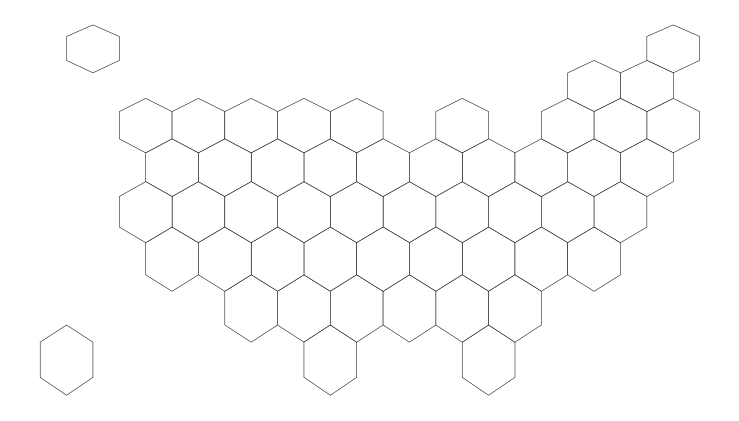

In [12]:
# Set the plot size for this notebook:
plt.rcParams["figure.figsize"]=13,13

# Draw a map with matplotlib
geoData.plot(color="white", edgecolor='black', linewidth=.5);
plt.axis('off');

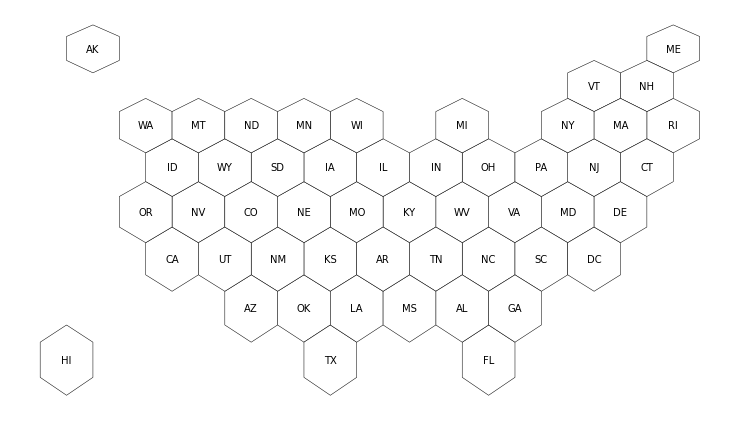

In [13]:
# add a "centroid" column with the centroid position of each county
geoData['centroid'] = geoData['geometry'].apply(lambda x: x.centroid)

# redraw the empty hexbin map:
geoData.plot(color="white", edgecolor='black', linewidth=.5);
plt.axis('off');

# for each county, annotate with the county name located at the centroid coordinates 
for idx, row in geoData.iterrows():
    plt.annotate(s=row['iso3166_2'], xy=row['centroid'].coords[0], horizontalalignment='center', va='center')

In [14]:
mariageData = pd.read_csv("https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/State_mariage_rate.csv")

# Add a new column to the geo dataframe that will be used for joining:
geoData['state'] = geoData['google_name'].str.replace(' \(United States\)','')

# Merge the mariage dataset with the geospatial information
geoData = geoData.set_index('state').join(mariageData.set_index('state'))

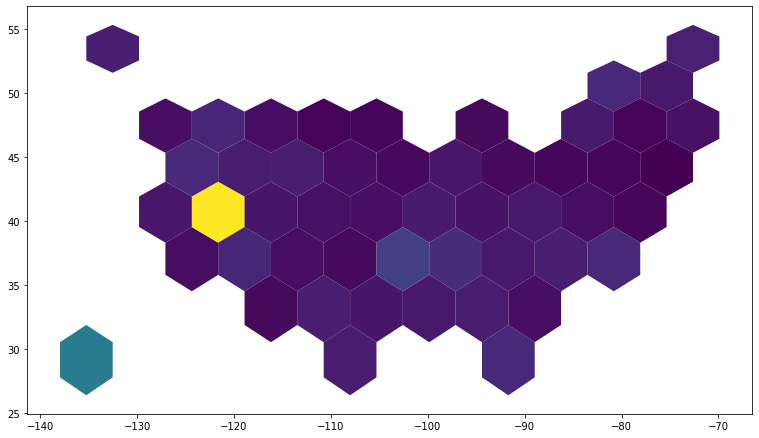

In [15]:
geoData.plot(column="y_2015", cmap="viridis");

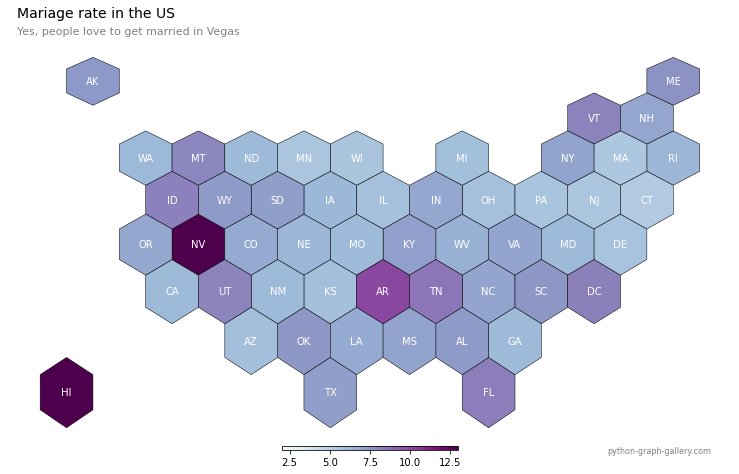

In [16]:
fig, ax = plt.subplots(1, figsize=(13, 13))

# map counties with the right color:
geoData.plot(
    ax=ax,
    column="y_2015", 
    cmap="BuPu", 
    norm=plt.Normalize(vmin=2, vmax=13),
    edgecolor='black', 
    linewidth=.5
);

# Remove useless axis
ax.axis('off');

# Add title, subtitle and author
ax.annotate('Mariage rate in the US', xy=(10,440),  xycoords='axes pixels', horizontalalignment='left', verticalalignment='top', fontsize=14, color='black')
ax.annotate('Yes, people love to get married in Vegas', xy=(10,420),  xycoords='axes pixels', horizontalalignment='left', verticalalignment='top', fontsize=11, color='#808080')
ax.annotate('python-graph-gallery.com', xy=(600,0),  xycoords='axes pixels', horizontalalignment='left', verticalalignment='top', fontsize=8, color='#808080')

# for each county, annotate with the county name located at the centroid coordinates 
for idx, row in geoData.iterrows():
    ax.annotate(
        s=row['iso3166_2'], 
        xy=row['centroid'].coords[0], 
        horizontalalignment='center', 
        va='center',
        color="white"
    )

# Add a color bar
sm = plt.cm.ScalarMappable(cmap='BuPu', norm=plt.Normalize(vmin=2, vmax=13))
fig.colorbar(sm, orientation="horizontal", aspect=50, fraction=0.005, pad=0 );
